# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

In [1]:
gpmpdata="focused.1000.T.csv.gz"

In [2]:
hkle='SVA_B'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [3]:
#threshold=3

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
import sklearn
sklearn.__version__

'0.24.2'

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
default_max_columns=pd.get_option('display.max_columns')

In [16]:
default_max_rows=pd.get_option('display.max_rows')

In [17]:
default_precision=pd.get_option('display.precision')

In [18]:
pd.set_option('display.precision', 2)

In [19]:
#default_threshold=np.get_printoptions()['threshold']

In [20]:
#np.set_printoptions(threshold=10000000)

# Read raw TCGA data and cleanup

In [21]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df.head()

chromosome                             chr1                                  \
position                            1409000 1410000 1580000 1581000 3751000   
sample         pup    hkle     mapq                                           
SF12149_S1L0_E paired HERVK113 Q20       11      10      11       0       0   
                      SVA_A    Q20        0       0       0       0       0   
                      SVA_B    Q20        0       0       0       2       0   
                      SVA_C    Q20        0       0       0       0       0   
                      SVA_D    Q20        0       0       0       0       0   

chromosome                                                                   \
position                            5573000 5592000 6304000 6306000 6714000   
sample         pup    hkle     mapq                                           
SF12149_S1L0_E paired HERVK113 Q20        0       0       3       0       0   
                      SVA_A    Q20        0       0       2       3       8   
                      SVA_B    Q20        0       0       1       1       8   
                      SVA_C    Q20        0       0       3       1       9   
                      SVA_D    Q20        0       0       3       1       9   

chromosome                           ...     chrY                             \
position                             ... 13104000 15774000 19535000 19536000   
sample         pup    hkle     mapq  ...                                       
SF12149_S1L0_E paired HERVK113 Q20   ...        2        2        0        0   
                      SVA_A    Q20   ...        0        0        0        0   
                      SVA_B    Q20   ...        0        0        0        0   
                      SVA_C    Q20   ...        0        0        0        0   
                      SVA_D    Q20   ...        0        0        0        0   

chromosome                                                               \
position                            19699000 19700000 20552000 20553000   
sample         pup    hkle     mapq                                       
SF12149_S1L0_E paired HERVK113 Q20         1       10        0        0   
                      SVA_A    Q20         0        0        0        4   
                      SVA_B    Q20         0        0        0        6   
                      SVA_C    Q20         0        0        0        4   
                      SVA_D    Q20         0        0        0        4   

chromosome                                             
position                            20976000 21217000  
sample         pup    hkle     mapq                    
SF12149_S1L0_E paired HERVK113 Q20         0        0  
                      SVA_A    Q20         0        0  
                      SVA_B    Q20         0        0  
                      SVA_C    Q20         0        0  
                      SVA_D    Q20         0        0  

[5 rows x 7235 columns]

In [22]:
gpmp_df.reset_index(inplace=True)
gpmp_df.head()

chromosome          sample     pup      hkle mapq    chr1                  \
position                                          1409000 1410000 1580000   
0           SF12149_S1L0_E  paired  HERVK113  Q20      11      10      11   
1           SF12149_S1L0_E  paired     SVA_A  Q20       0       0       0   
2           SF12149_S1L0_E  paired     SVA_B  Q20       0       0       0   
3           SF12149_S1L0_E  paired     SVA_C  Q20       0       0       0   
4           SF12149_S1L0_E  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 3751000 5573000  ... 13104000 15774000 19535000 19536000   
0                0       0       0  ...        2        2        0        0   
1                0       0       0  ...        0        0        0        0   
2                2       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                                        
position   19699000 19700000 20552000 20553000 20976000 21217000  
0                 1       10        0        0        0        0  
1                 0        0        0        4        0        0  
2                 0        0        0        6        0        0  
3                 0        0        0        4        0        0  
4                 0        0        0        4        0        0  

[5 rows x 7239 columns]

In [23]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

0      SF12149
1      SF12149
2      SF12149
3      SF12149
4      SF12149
        ...   
443    SF12656
444    SF12656
445    SF12656
446    SF12656
447    SF12656
Name: subject, Length: 448, dtype: object

In [24]:
gpmp_df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1409000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            (   'chr1',  '1581000'),
            (   'chr1',  '3751000'),
            (   'chr1',  '5573000'),
            ...
            (   'chrY', '15774000'),
            (   'chrY', '19535000'),
            (   'chrY', '19536000'),
            (   'chrY', '19699000'),
            (   'chrY', '19700000'),
            (   'chrY', '20552000'),
            (   'chrY', '20553000'),
            (   'chrY', '20976000'),
            (   'chrY', '21217000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=7240)

In [25]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df.head()

chromosome           sample     pup   hkle mapq    chr1                  \
position                                        1409000 1410000 1580000   
2            SF12149_S1L0_E  paired  SVA_B  Q20       0       0       0   
9            SF12149_S1L1_N  paired  SVA_B  Q20       0       0       0   
16          SF12149_S2L0_NE  paired  SVA_B  Q20       0       0       0   
23           SF12210_S2L1_N  paired  SVA_B  Q20       0       0       0   
30           SF12210_S3L1_E  paired  SVA_B  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 3751000 5573000  ... 15774000 19535000 19536000 19699000   
2                2       0       0  ...        0        0        0        0   
9                0       0       0  ...        0        0        4        0   
16               3       0       0  ...        0        0        1        0   
23               0       0       0  ...        0        0        0        0   
30               0       0       0  ...        0        0        0        0   

chromosome                                               subject  
position   19700000 20552000 20553000 20976000 21217000           
2                 0        0        6        0        0  SF12149  
9                 0        0        1        0        0  SF12149  
16                0        0        0        0        1  SF12149  
23                0        0        0        0        0  SF12210  
30                0        0        0        0        0  SF12210  

[5 rows x 7240 columns]

In [26]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df.head()

chromosome                                   chr1                          \
position                                  1409000 1410000 1580000 1581000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L0_E  paired SVA_B Q20        0       0       0       2   
        SF12149_S1L1_N  paired SVA_B Q20        0       0       0       0   
        SF12149_S2L0_NE paired SVA_B Q20        0       0       0       3   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        0       0       0       0   
        SF12210_S3L1_E  paired SVA_B Q20        0       0       0       0   

chromosome                                                                 \
position                                  3751000 5573000 5592000 6304000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L0_E  paired SVA_B Q20        0       0       0       1   
        SF12149_S1L1_N  paired SVA_B Q20        0       0       0       1   
        SF12149_S2L0_NE paired SVA_B Q20        0       0       0       4   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        0       0       0       1   
        SF12210_S3L1_E  paired SVA_B Q20        0       0       0       5   

chromosome                                                 ...     chrY  \
position                                  6306000 6714000  ... 13104000   
subject sample          pup    hkle  mapq                  ...            
SF12149 SF12149_S1L0_E  paired SVA_B Q20        1       8  ...        0   
        SF12149_S1L1_N  paired SVA_B Q20        2       3  ...        0   
        SF12149_S2L0_NE paired SVA_B Q20        3       5  ...        0   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        2       1  ...        0   
        SF12210_S3L1_E  paired SVA_B Q20        1       7  ...        0   

chromosome                                                                     \
position                                  15774000 19535000 19536000 19699000   
subject sample          pup    hkle  mapq                                       
SF12149 SF12149_S1L0_E  paired SVA_B Q20         0        0        0        0   
        SF12149_S1L1_N  paired SVA_B Q20         0        0        4        0   
        SF12149_S2L0_NE paired SVA_B Q20         0        0        1        0   
SF12210 SF12210_S2L1_N  paired SVA_B Q20         0        0        0        0   
        SF12210_S3L1_E  paired SVA_B Q20         0        0        0        0   

chromosome                                                                     \
position                                  19700000 20552000 20553000 20976000   
subject sample          pup    hkle  mapq                                       
SF12149 SF12149_S1L0_E  paired SVA_B Q20         0        0        6        0   
        SF12149_S1L1_N  paired SVA_B Q20         0        0        1        0   
        SF12149_S2L0_NE paired SVA_B Q20         0        0        0        0   
SF12210 SF12210_S2L1_N  paired SVA_B Q20         0        0        0        0   
        SF12210_S3L1_E  paired SVA_B Q20         0        0        0        0   

chromosome                                          
position                                  21217000  
subject sample          pup    hkle  mapq           
SF12149 SF12149_S1L0_E  paired SVA_B Q20         0  
        SF12149_S1L1_N  paired SVA_B Q20         0  
        SF12149_S2L0_NE paired SVA_B Q20         1  
SF12210 SF12210_S2L1_N  paired SVA_B Q20         0  
        SF12210_S3L1_E  paired SVA_B Q20         0  

[5 rows x 7235 columns]

In [27]:
gpmp_df.shape

(64, 7235)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [28]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [29]:
gpmp_df.head()

chromosome                 chr1                                          \
position                1409000 1410000 1580000 1581000 3751000 5573000   
subject sample                                                            
SF12149 SF12149_S1L0_E        0       0       0       2       0       0   
        SF12149_S1L1_N        0       0       0       0       0       0   
        SF12149_S2L0_NE       0       0       0       3       0       0   
SF12210 SF12210_S2L1_N        0       0       0       0       0       0   
        SF12210_S3L1_E        0       0       0       0       0       0   

chromosome                                               ...     chrY  \
position                5592000 6304000 6306000 6714000  ... 13104000   
subject sample                                           ...            
SF12149 SF12149_S1L0_E        0       1       1       8  ...        0   
        SF12149_S1L1_N        0       1       2       3  ...        0   
        SF12149_S2L0_NE       0       4       3       5  ...        0   
SF12210 SF12210_S2L1_N        0       1       2       1  ...        0   
        SF12210_S3L1_E        0       5       1       7  ...        0   

chromosome                                                                     \
position                15774000 19535000 19536000 19699000 19700000 20552000   
subject sample                                                                  
SF12149 SF12149_S1L0_E         0        0        0        0        0        0   
        SF12149_S1L1_N         0        0        4        0        0        0   
        SF12149_S2L0_NE        0        0        1        0        0        0   
SF12210 SF12210_S2L1_N         0        0        0        0        0        0   
        SF12210_S3L1_E         0        0        0        0        0        0   

chromosome                                          
position                20553000 20976000 21217000  
subject sample                                      
SF12149 SF12149_S1L0_E         6        0        0  
        SF12149_S1L1_N         1        0        0  
        SF12149_S2L0_NE        0        0        1  
SF12210 SF12210_S2L1_N         0        0        0  
        SF12210_S3L1_E         0        0        0  

[5 rows x 7235 columns]

In [30]:
gpmp_df.shape

(64, 7235)

In [31]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               0             0             0   
        SF12149_S1L1_N               0             0             0   
        SF12149_S2L0_NE              0             0             0   
SF12210 SF12210_S2L1_N               0             0             0   
        SF12210_S3L1_E               0             0             0   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              0             0             0   
        SF12634_S13L4_E              0             0             0   
        SF12634_S14L4_NE             0             0             0   
SF12656 SF12656_S11L4_N              0             0             0   
        SF12656_S1L1_E               0             1             0   

                          chr1 1581000  chr1 3751000  chr1 5573000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               2             0             0   
        SF12149_S1L1_N               0             0             0   
        SF12149_S2L0_NE              3             0             0   
SF12210 SF12210_S2L1_N               0             0             0   
        SF12210_S3L1_E               0             0             0   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              4             0             0   
        SF12634_S13L4_E              0             0             0   
        SF12634_S14L4_NE             0             0             0   
SF12656 SF12656_S11L4_N              1             0             0   
        SF12656_S1L1_E               3             0             0   

                          chr1 5592000  chr1 6304000  chr1 6306000  \
subject sample                                                       
SF12149 SF12149_S1L0_E               0             1             1   
        SF12149_S1L1_N               0             1             2   
        SF12149_S2L0_NE              0             4             3   
SF12210 SF12210_S2L1_N               0             1             2   
        SF12210_S3L1_E               0             5             1   
...                                ...           ...           ...   
SF12634 SF12634_S10L4_N              0             8             3   
        SF12634_S13L4_E              1             4             1   
        SF12634_S14L4_NE             0             2             2   
SF12656 SF12656_S11L4_N              0             3             3   
        SF12656_S1L1_E               0             5             1   

                          chr1 6714000  ...  chrY 13104000  chrY 15774000  \
subject sample                          ...                                 
SF12149 SF12149_S1L0_E               8  ...              0              0   
        SF12149_S1L1_N               3  ...              0              0   
        SF12149_S2L0_NE              5  ...              0              0   
SF12210 SF12210_S2L1_N               1  ...              0              0   
        SF12210_S3L1_E               7  ...              0              0   
...                                ...  ...            ...            ...   
SF12634 SF12634_S10L4_N              3  ...              0              0   
        SF12634_S13L4_E              2  ...              0              0   
        SF12634_S14L4_NE             1  ...              0              0   
SF12656 SF12656_S11L4_N              1  ...              0              0   
        SF12656_S1L1_E               0  ...              0              0   

                          chrY 19535000  chrY 19536000  chrY 19699000  \
subject sample                                                          
SF12149 SF12149_S1L0_E                0              0              0   
        SF12149_S1L1_N                0              4              0   

In [32]:
gpmp_df.reset_index(inplace=True)
gpmp_df['type']=gpmp_df['sample'].str.split('_',expand=True)[2]

In [33]:
gpmp_df['type'].head()

0     E
1     N
2    NE
3     N
4     E
Name: type, dtype: object

In [34]:
gpmp_df.head()

,subject,sample,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,...,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type
0,SF12149,SF12149_S1L0_E,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,6,0,0,E
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,0,1,...,0,0,4,0,0,0,1,0,0,N
2,SF12149,SF12149_S2L0_NE,0,0,0,3,0,0,0,4,...,0,0,1,0,0,0,0,0,1,NE
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
4,SF12210,SF12210_S3L1_E,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,E


# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [35]:
gpmp_counts=pd.read_csv("raw_read_counts.csv")
gpmp_counts.head()

,sample,raw pair count
0,SF12149_S1L0_E,1515318278
1,SF12149_S1L1_N,660620929
2,SF12149_S2L0_NE,1334986480
3,SF12210_S2L1_N,597544666
4,SF12210_S3L1_E,1487133148


In [36]:
gpmp_df.reset_index(drop=True,inplace=True)
gpmp_df

,subject,sample,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,...,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type
0,SF12149,SF12149_S1L0_E,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,6,0,0,E
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,0,1,...,0,0,4,0,0,0,1,0,0,N
2,SF12149,SF12149_S2L0_NE,0,0,0,3,0,0,0,4,...,0,0,1,0,0,0,0,0,1,NE
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
4,SF12210,SF12210_S3L1_E,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SF12634,SF12634_S10L4_N,0,0,0,4,0,0,0,8,...,0,0,4,0,0,0,3,0,0,N
60,SF12634,SF12634_S13L4_E,0,0,0,0,0,0,1,4,...,0,0,2,0,0,0,2,0,0,E
61,SF12634,SF12634_S14L4_NE,0,0,0,0,0,0,0,2,...,0,0,4,0,0,0,2,0,1,NE
62,SF12656,SF12656_S11L4_N,0,0,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,N


In [37]:
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
#gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

,subject,sample,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,...,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type,raw pair count
0,SF12149,SF12149_S1L0_E,0,0,0,2,0,0,0,1,...,0,0,0,0,0,6,0,0,E,1515318278
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,0,1,...,0,4,0,0,0,1,0,0,N,660620929
2,SF12149,SF12149_S2L0_NE,0,0,0,3,0,0,0,4,...,0,1,0,0,0,0,0,1,NE,1334986480
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,N,597544666
4,SF12210,SF12210_S3L1_E,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,E,1487133148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SF12634,SF12634_S10L4_N,0,0,0,4,0,0,0,8,...,0,4,0,0,0,3,0,0,N,1403120096
60,SF12634,SF12634_S13L4_E,0,0,0,0,0,0,1,4,...,0,2,0,0,0,2,0,0,E,1528226977
61,SF12634,SF12634_S14L4_NE,0,0,0,0,0,0,0,2,...,0,4,0,0,0,2,0,1,NE,1075444460
62,SF12656,SF12656_S11L4_N,0,0,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,N,1320466667


# Sums up like samples

## Subjects only have 1 normal but usually 4 tumors

In [38]:
sums=pd.DataFrame(data=None, columns=gpmp_df.columns)
sums

,subject,sample,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,...,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type,raw pair count


In [39]:
gpmp_df['subject'].unique()

array(['SF12149', 'SF12210', 'SF12255', 'SF12271', 'SF12288', 'SF12333',
       'SF12407', 'SF12430', 'SF12460', 'SF12480', 'SF12495', 'SF12577',
       'SF12634', 'SF12656'], dtype=object)

In [40]:
for subject in gpmp_df['subject'].unique():
    print(subject)
    for type in ['NE','E']:
        print(type)
        if len(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)]) > 1:
            tmp=pd.DataFrame(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)].sum()).T
            tmp['subject']=subject
            tmp['type']=type
            sums=sums.append(tmp)
            gpmp_df.drop(gpmp_df[(gpmp_df['subject']==subject)&( gpmp_df['type']==type)].index,inplace=True)


SF12149
NE
E
SF12210
NE
E
SF12255
NE
E
SF12271
NE
E
SF12288
NE
E
SF12333
NE
E
SF12407
NE
E
SF12430
NE
E
SF12460
NE
E
SF12480
NE
E
SF12495
NE
E
SF12577
NE
E
SF12634
NE
E
SF12656
NE
E


In [41]:
gpmp_df

,subject,sample,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,...,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type,raw pair count
0,SF12149,SF12149_S1L0_E,0,0,0,2,0,0,0,1,...,0,0,0,0,0,6,0,0,E,1515318278
1,SF12149,SF12149_S1L1_N,0,0,0,0,0,0,0,1,...,0,4,0,0,0,1,0,0,N,660620929
2,SF12149,SF12149_S2L0_NE,0,0,0,3,0,0,0,4,...,0,1,0,0,0,0,0,1,NE,1334986480
3,SF12210,SF12210_S2L1_N,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,N,597544666
4,SF12210,SF12210_S3L1_E,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,E,1487133148
5,SF12210,SF12210_S4L1_NE,0,0,0,1,0,0,0,5,...,0,0,0,0,0,0,0,0,NE,1377641046
6,SF12255,SF12255_S5L1_E,0,0,0,0,0,0,0,2,...,0,1,0,0,0,1,0,0,E,1422097108
7,SF12255,SF12255_S6L1_NE,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,NE,1341644793
8,SF12255,SF12255_S7L2_N,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,N,688035696
9,SF12271,SF12271_S7L1_E,0,0,0,4,0,0,0,6,...,0,4,0,0,0,8,0,0,E,1477360307


In [42]:
sums

,subject,sample,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,...,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type,raw pair count
0,SF12288,SF12288_S2L1_NESF12288_S2L2_NESF12288_S2L3_NES...,0,0,0,1,0,0,0,9,...,0,2,0,0,0,4,0,0,NE,1512280616
0,SF12288,SF12288_S1L1_ESF12288_S1L2_ESF12288_S1L3_ESF12...,0,0,0,2,0,0,0,3,...,0,2,0,0,0,8,0,0,E,1394567427
0,SF12333,SF12333_S4L1_NESF12333_S4L2_NESF12333_S4L3_NES...,0,0,0,4,0,0,0,5,...,0,0,0,0,0,0,0,0,NE,1605351572
0,SF12333,SF12333_S3L1_ESF12333_S3L2_ESF12333_S3L3_ESF12...,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,E,1425231172
0,SF12407,SF12407_S6L1_NESF12407_S6L2_NESF12407_S6L3_NES...,0,0,0,1,0,0,0,5,...,0,0,0,0,0,0,0,0,NE,1531845212
0,SF12407,SF12407_S5L1_ESF12407_S5L2_ESF12407_S5L3_ESF12...,0,1,0,5,0,0,0,5,...,0,0,0,0,0,0,0,0,E,1636784693
0,SF12430,SF12430_S8L1_NESF12430_S8L2_NESF12430_S8L3_NES...,0,0,0,2,0,0,0,6,...,0,0,0,0,0,0,0,0,NE,1613935035
0,SF12430,SF12430_S7L1_ESF12430_S7L2_ESF12430_S7L3_ESF12...,0,0,0,3,0,0,0,6,...,0,0,0,0,0,0,0,0,E,1762174970


In [43]:
gpmp_df=gpmp_df.append(sums)

In [44]:
gpmp_df.drop('sample',axis='columns',inplace=True)

In [45]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


In [46]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

,subject,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,chr1 6306000,...,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type
0,SF12149,0.0,0.0,0.0,1.32,0.0,0.0,0.0,0.66,0.66,...,0.0,0.0,0.0,0.0,0.0,0.0,3.96,0.0,0.0,E
1,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.51,3.03,...,0.0,0.0,6.05,0.0,0.0,0.0,1.51,0.0,0.0,N
2,SF12149,0.0,0.0,0.0,2.25,0.0,0.0,0.0,3.0,2.25,...,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.75,NE
3,SF12210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.67,3.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,SF12210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.36,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E
5,SF12210,0.0,0.0,0.0,0.73,0.0,0.0,0.0,3.63,2.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NE
6,SF12255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,0.7,...,0.0,0.0,0.7,0.0,0.0,0.0,0.7,0.0,0.0,E
7,SF12255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,NE
8,SF12255,0.0,0.0,0.0,1.45,0.0,0.0,0.0,0.0,1.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.91,0.0,0.0,N
9,SF12271,0.0,0.0,0.0,2.71,0.0,0.0,0.0,4.06,1.35,...,0.0,0.0,2.71,0.0,0.0,0.0,5.42,0.0,0.0,E


In [47]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
#    localdf.reset_index(inplace=True)
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
#                t,p = stats.ttest_rel(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
#    selected=['sample',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
#        tmp.set_index(['sample',group_column],inplace=True)
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
#        tmp.set_index(['sample'],inplace=True)
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
#        pcadf.set_index(['sample',group_column],inplace=True)
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column + " : select p < " + str(heat_p) , fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [48]:
gpmp_df.reset_index(inplace=True)
gpmp_df.head()

,index,subject,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 5592000,chr1 6304000,...,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21217000,type
0,0,SF12149,0.0,0.0,0.0,1.32,0.0,0.0,0.0,0.66,...,0.0,0.0,0.0,0.0,0.0,0.0,3.96,0.0,0.0,E
1,1,SF12149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.51,...,0.0,0.0,6.05,0.0,0.0,0.0,1.51,0.0,0.0,N
2,2,SF12149,0.0,0.0,0.0,2.25,0.0,0.0,0.0,3.0,...,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.75,NE
3,3,SF12210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,4,SF12210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E


In [49]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 15:16:41'

type
T-Testing
Boxplotting
 p : 1.2982836619990239e-05  ( t : 5.461478988856225 ) :  chr15 43013000


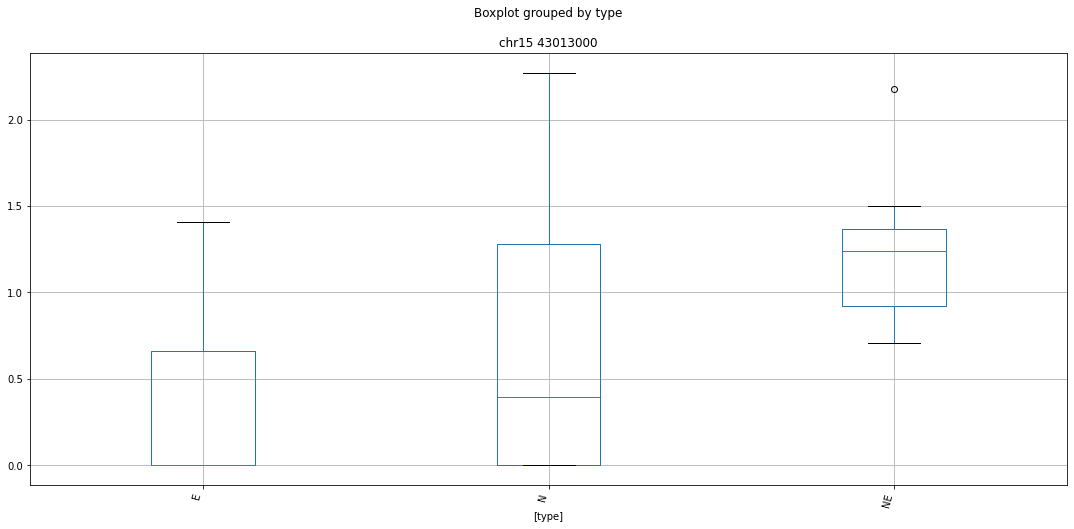

 p : 4.4684107117462044e-05  ( t : 4.971487448780206 ) :  chr15 65734000


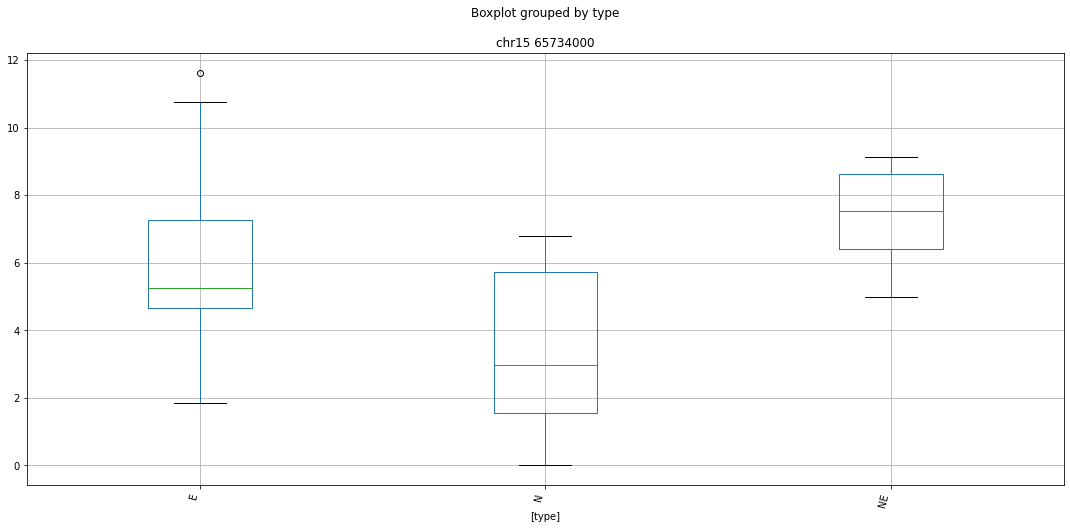

 p : 5.705700505319725e-05  ( t : 4.875147766296686 ) :  chr17 28223000


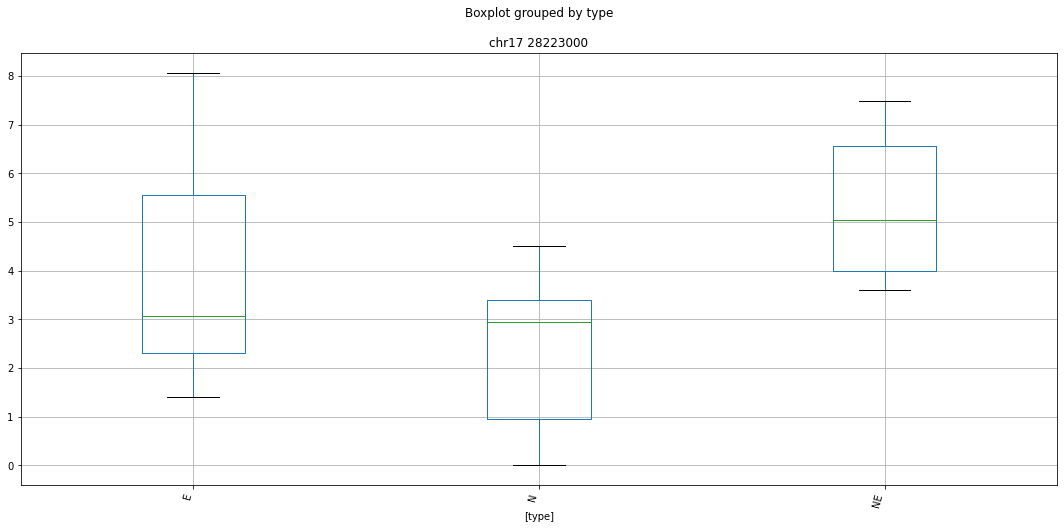

Clustermapping
['chr1 10028000' 'chr1 10029000' 'chr1 10427000' ... 'chrY 8917000'
 'subject' 'type']


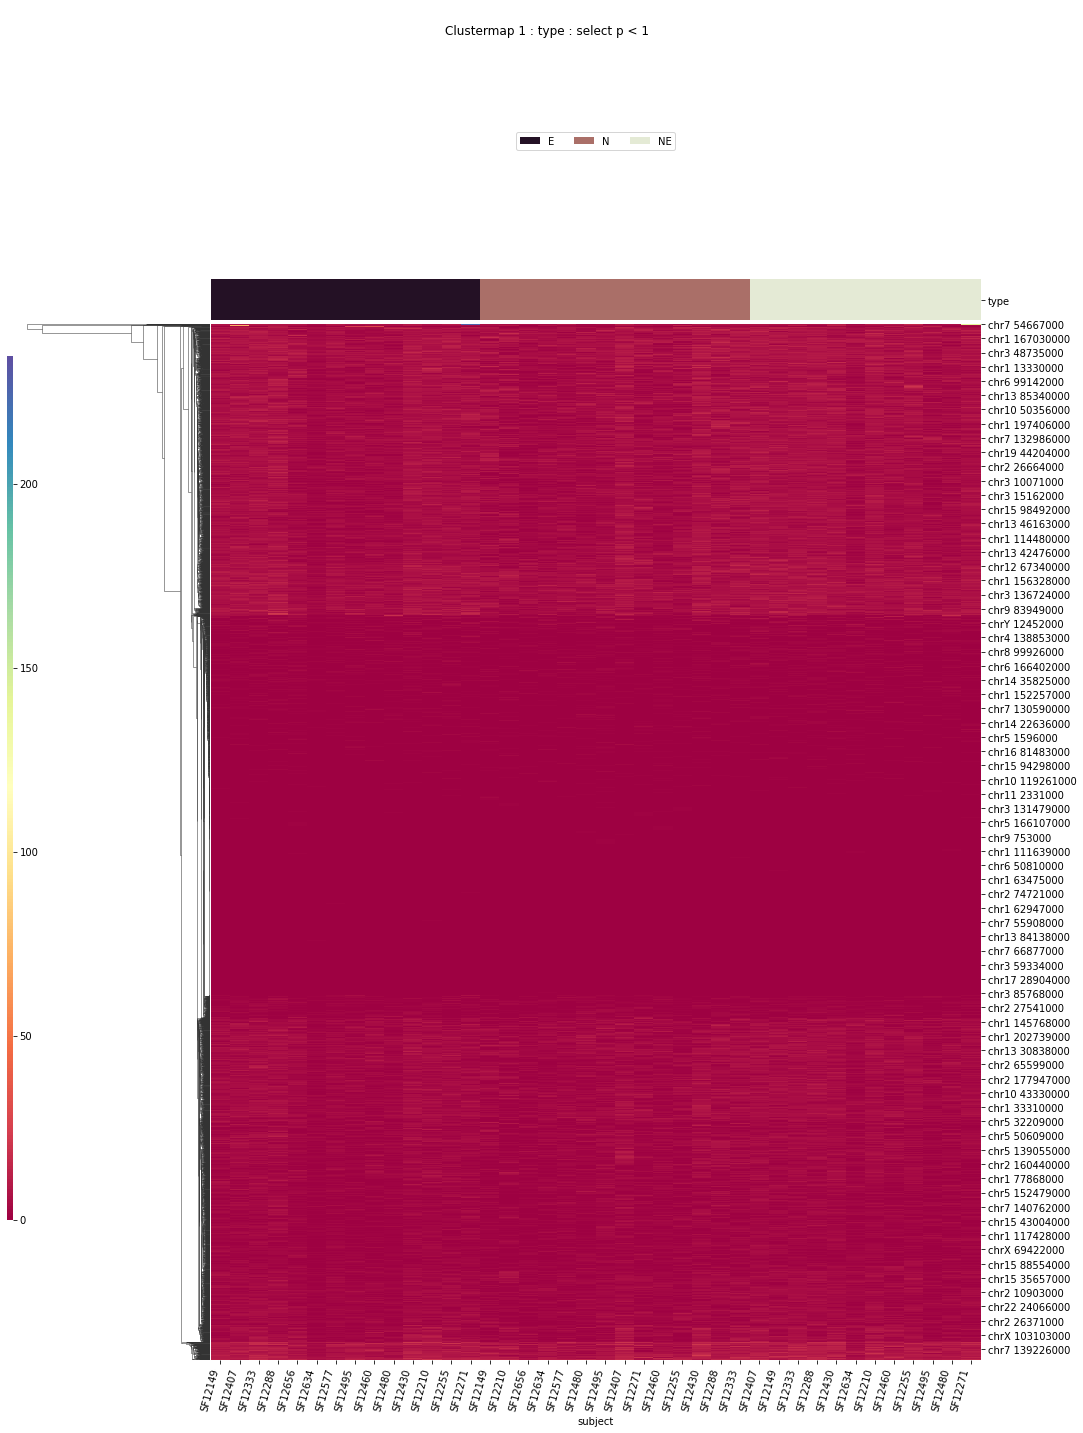

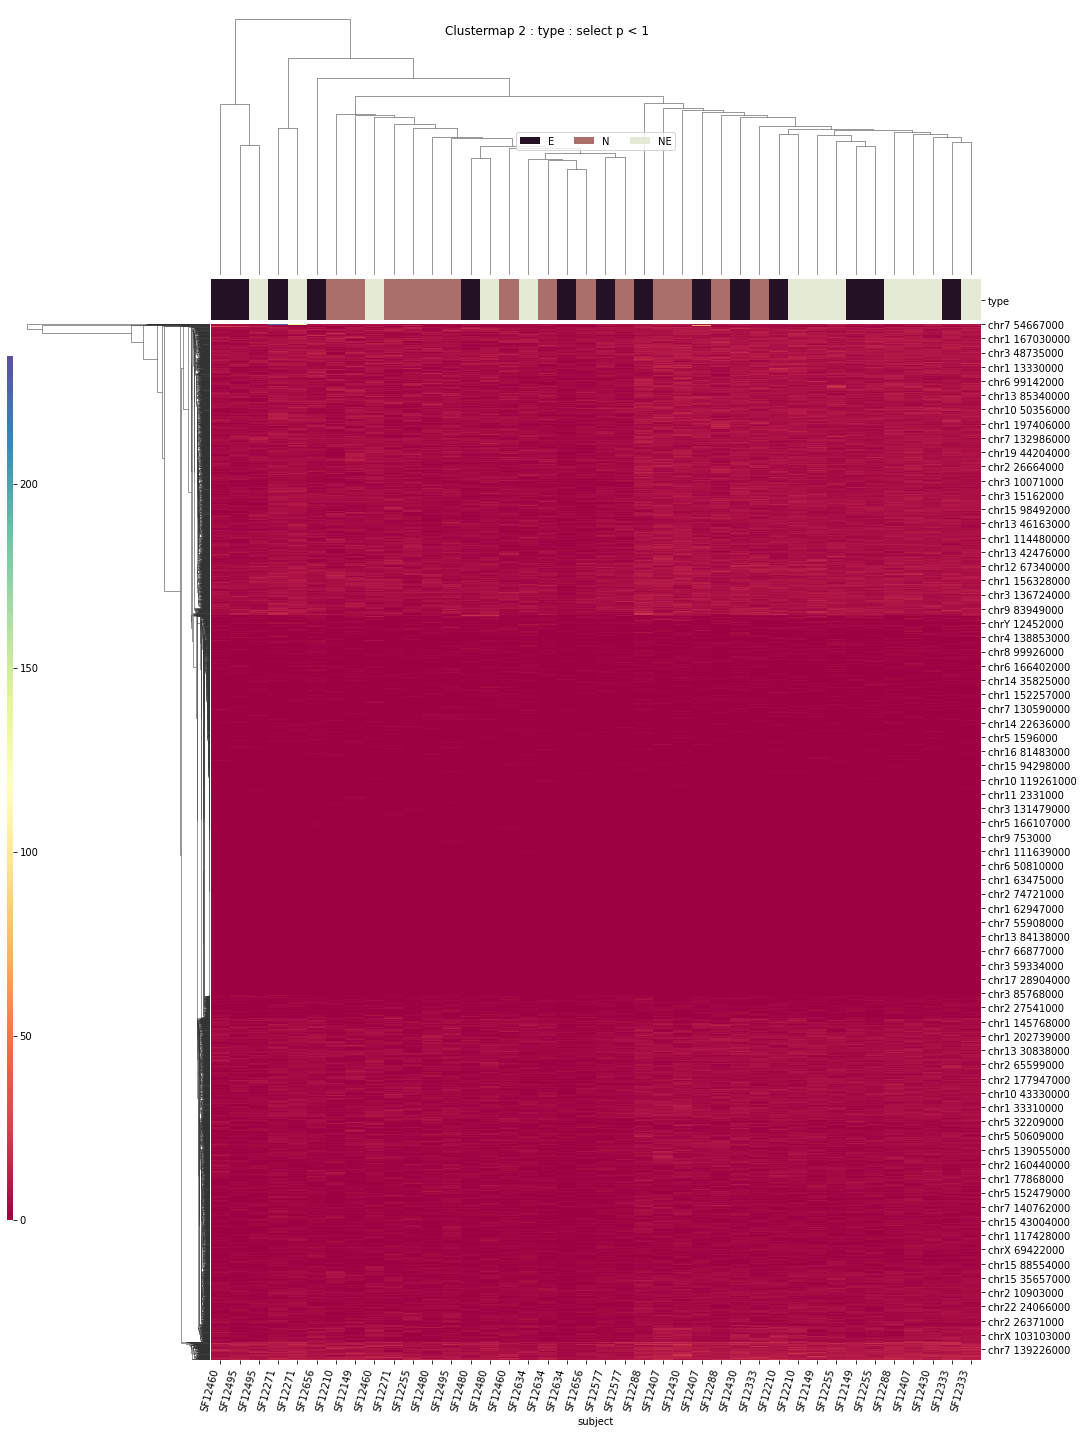

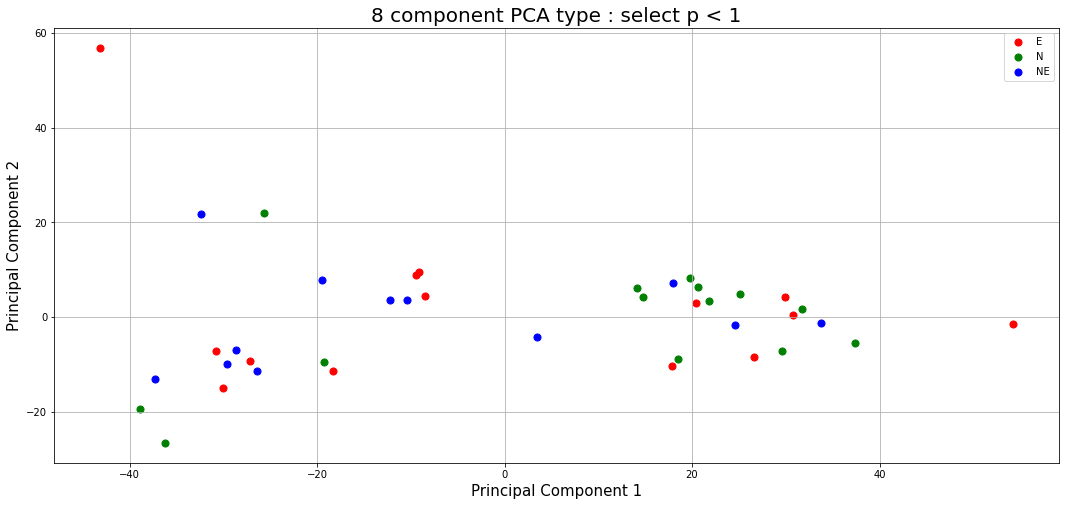

In [50]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-4,heat_p=1)
    

In [51]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 15:42:54'

type
T-Testing
Boxplotting
Clustermapping
['chr1 10028000' 'chr1 10029000' 'chr1 10427000' ... 'chrY 8917000'
 'subject' 'type']


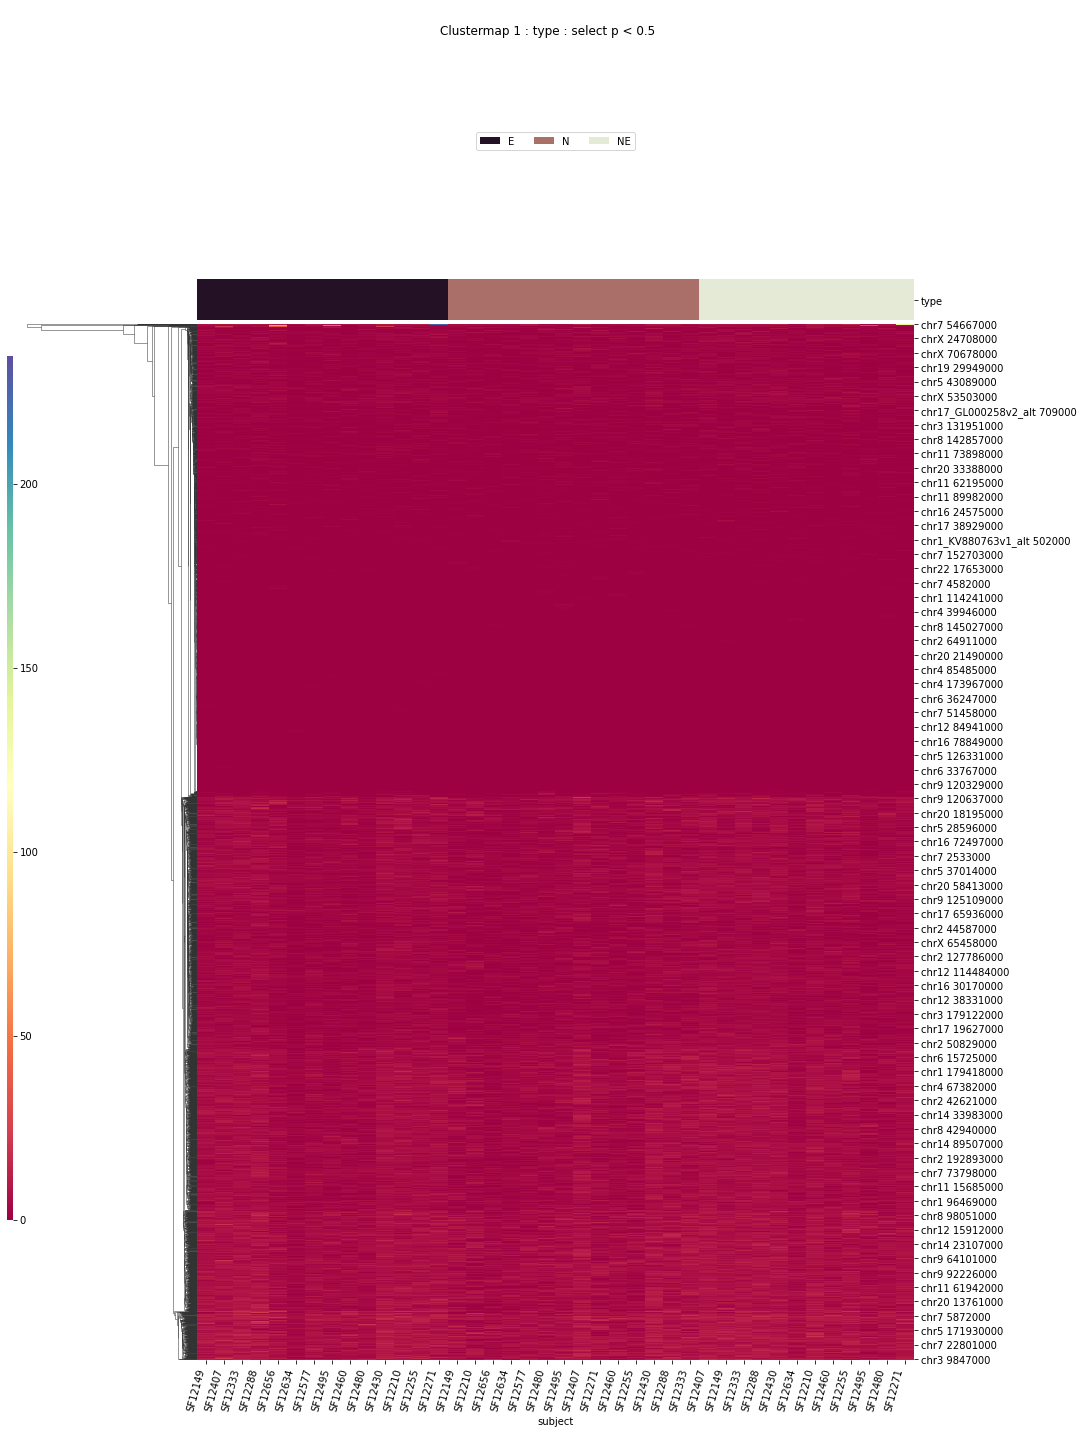

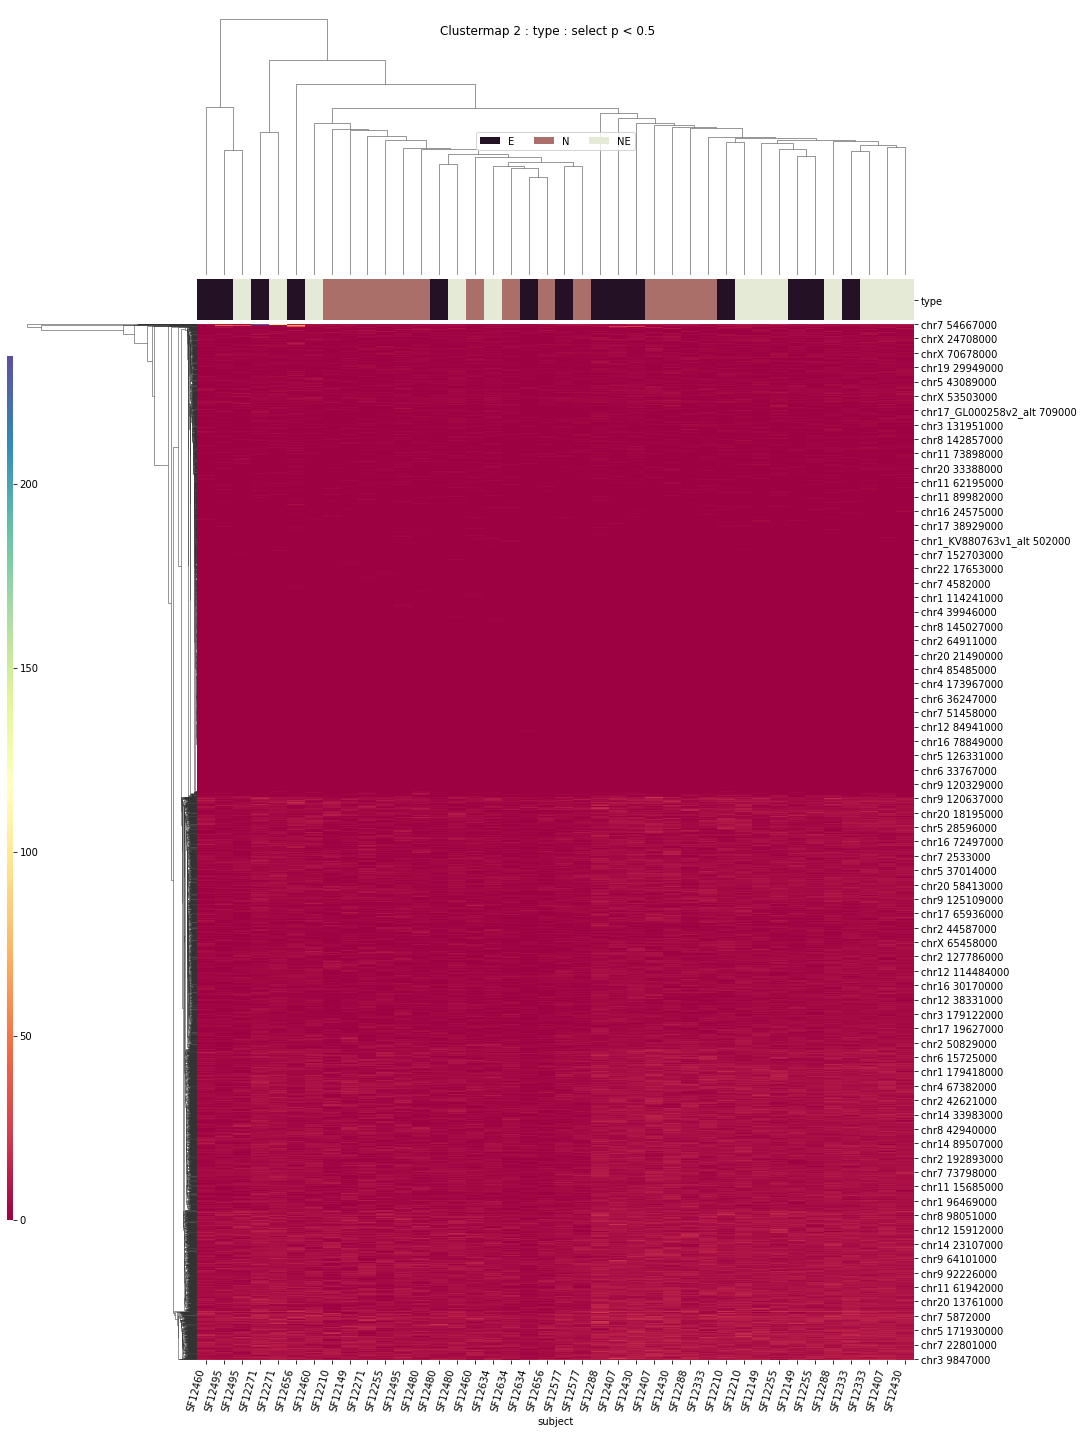

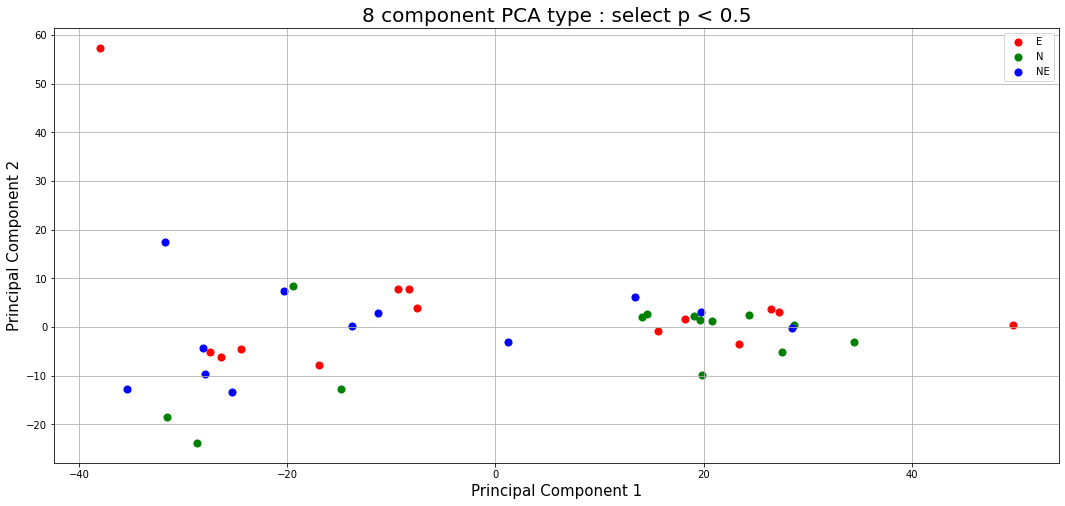

In [52]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-6,heat_p=0.5)
    

In [53]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 16:09:48'

type
T-Testing
Boxplotting
Clustermapping
['chr1 109074000' 'chr1 111800000' 'chr1 112641000' ... 'chrY 21217000'
 'subject' 'type']


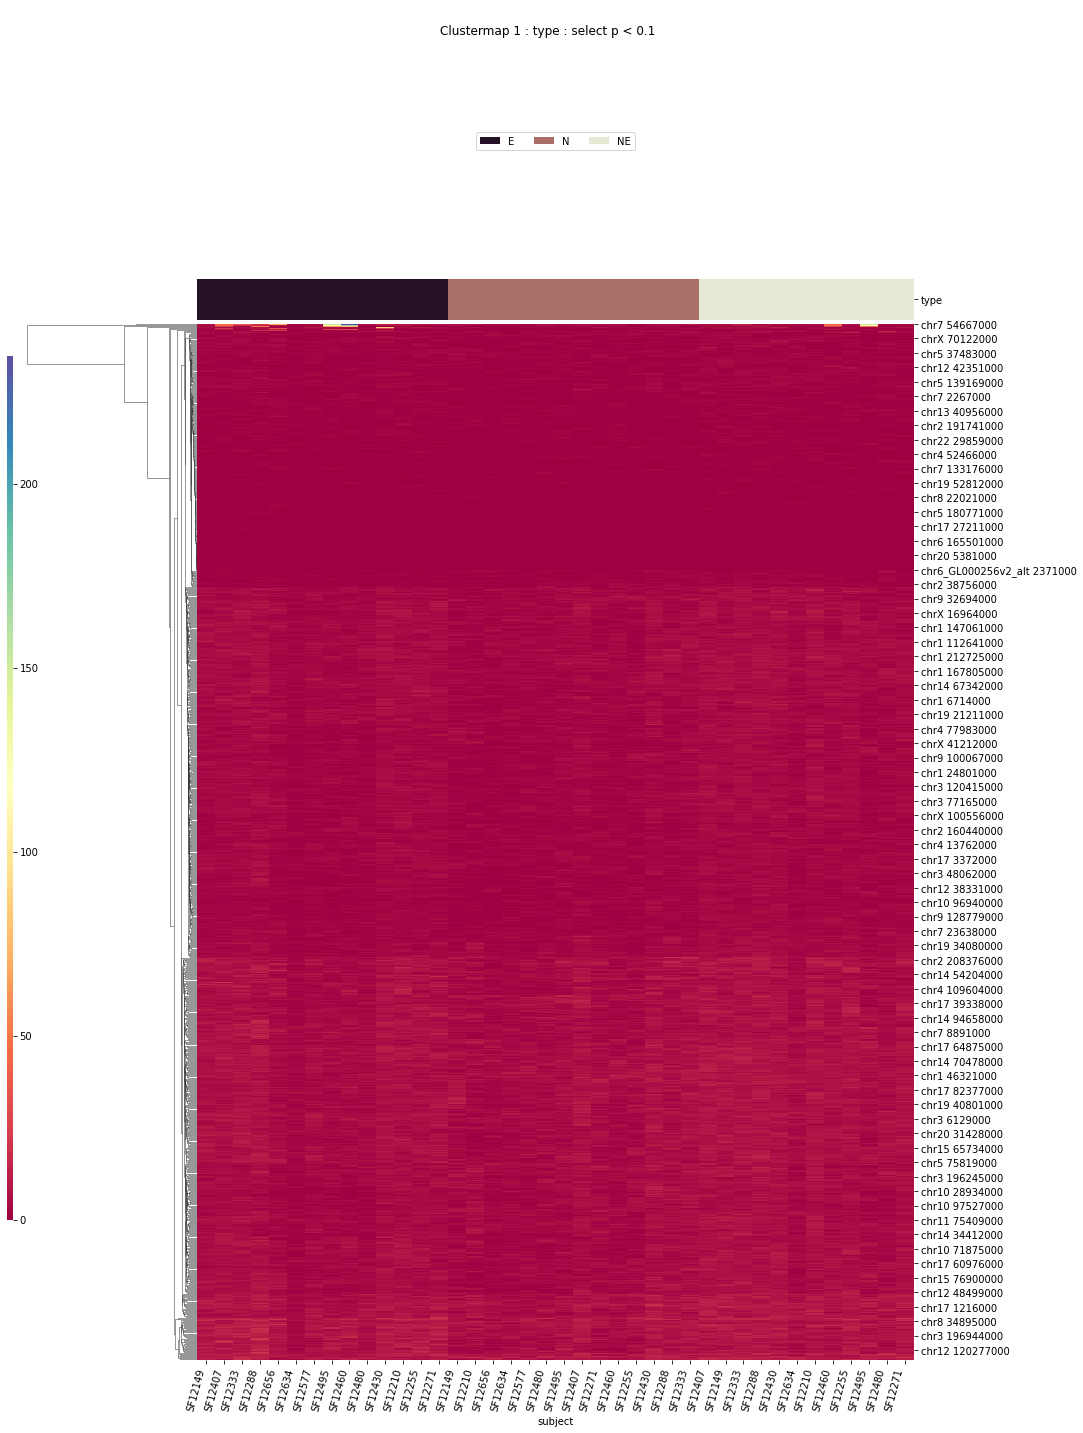

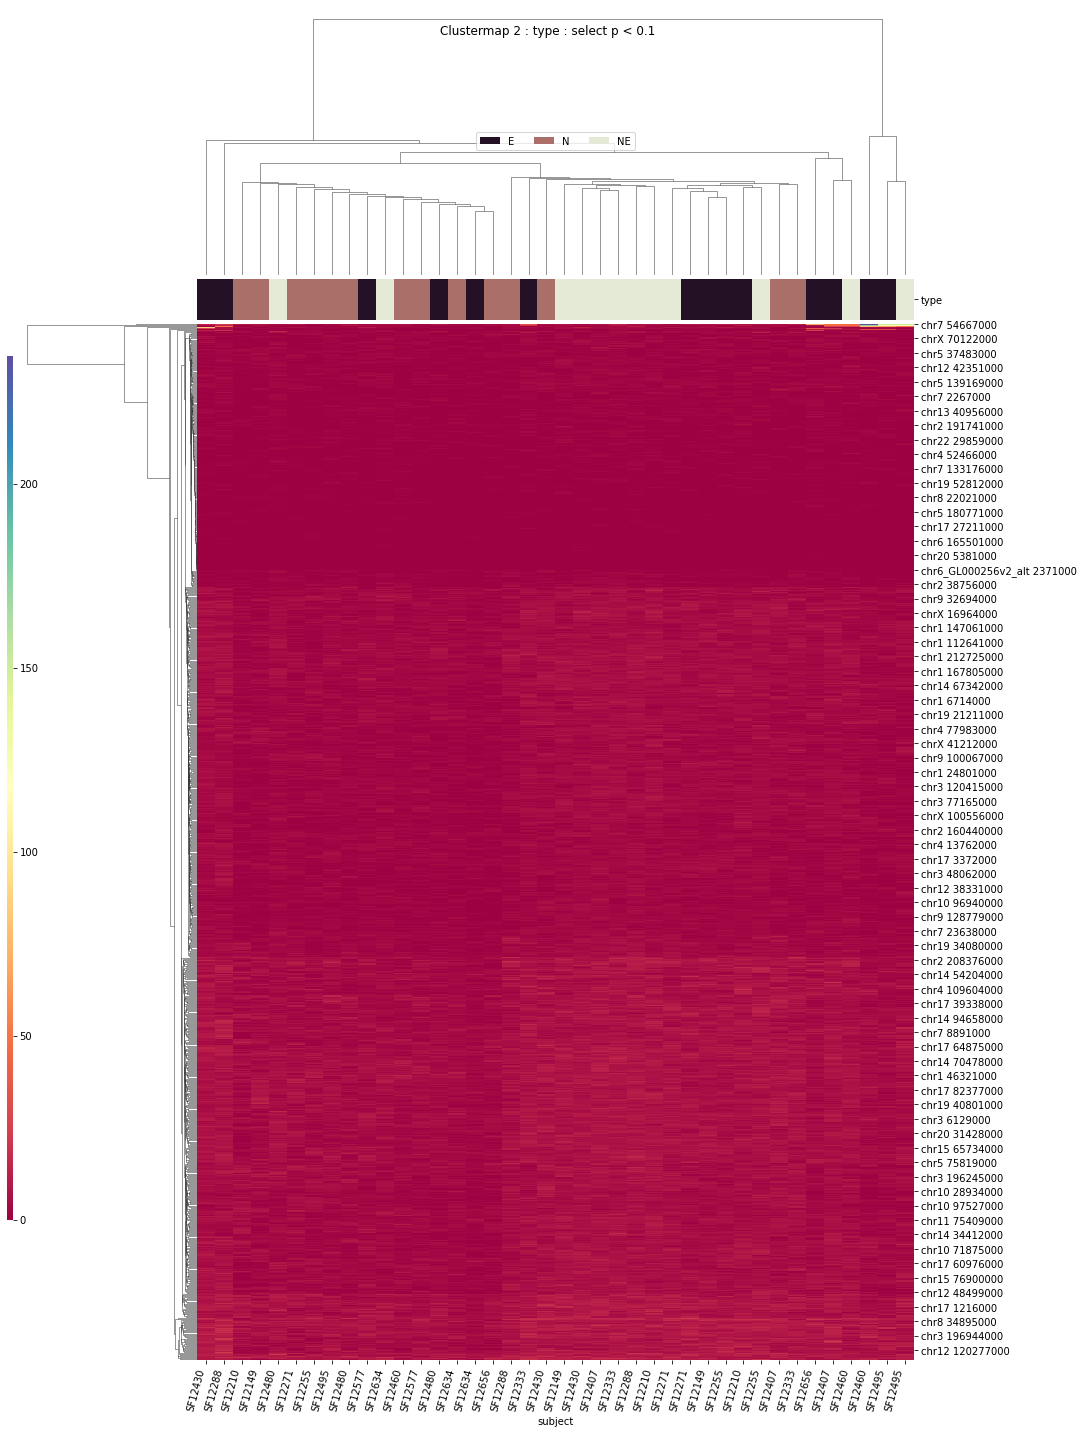

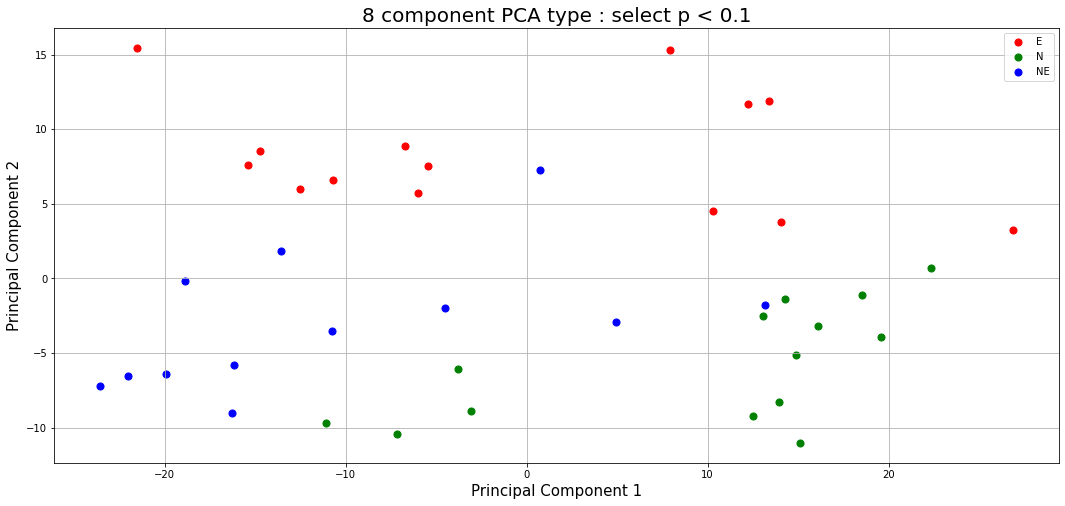

In [54]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-9,heat_p=0.1)
    

In [55]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 16:34:18'

type
T-Testing
Boxplotting
Clustermapping
['chr1 152197000' 'chr1 15379000' 'chr1 202451000' 'chr1 224100000'
 'chr1 226114000' 'chr1 234266000' 'chr1 235310000' 'chr1 45114000'
 'chr1 45765000' 'chr1 99856000' 'chr1 99857000' 'chr10 100276000'
 'chr10 110768000' 'chr10 119260000' 'chr10 21431000' 'chr10 69993000'
 'chr10 75751000' 'chr10 78467000' 'chr10 95808000' 'chr11 61942000'
 'chr11 62355000' 'chr11 65452000' 'chr11 70456000' 'chr11 79805000'
 'chr11 86770000' 'chr12 110866000' 'chr12 14354000' 'chr12 28200000'
 'chr12 38331000' 'chr12 42229000' 'chr12 4721000' 'chr12 54487000'
 'chr12 56790000' 'chr12 56962000' 'chr12 6474000' 'chr12 75943000'
 'chr12 90411000' 'chr14 55455000' 'chr14 67342000' 'chr15 43013000'
 'chr15 60365000' 'chr15 65734000' 'chr15 75558000' 'chr15 89855000'
 'chr15 92607000' 'chr16 25222000' 'chr16 48417000' 'chr16 70224000'
 'chr16 84767000' 'chr16 9167000' 'chr17 28223000' 'chr17 31035000'
 'chr17 3853000' 'chr17 60976000' 'chr18 11960000' 'chr18 1297900

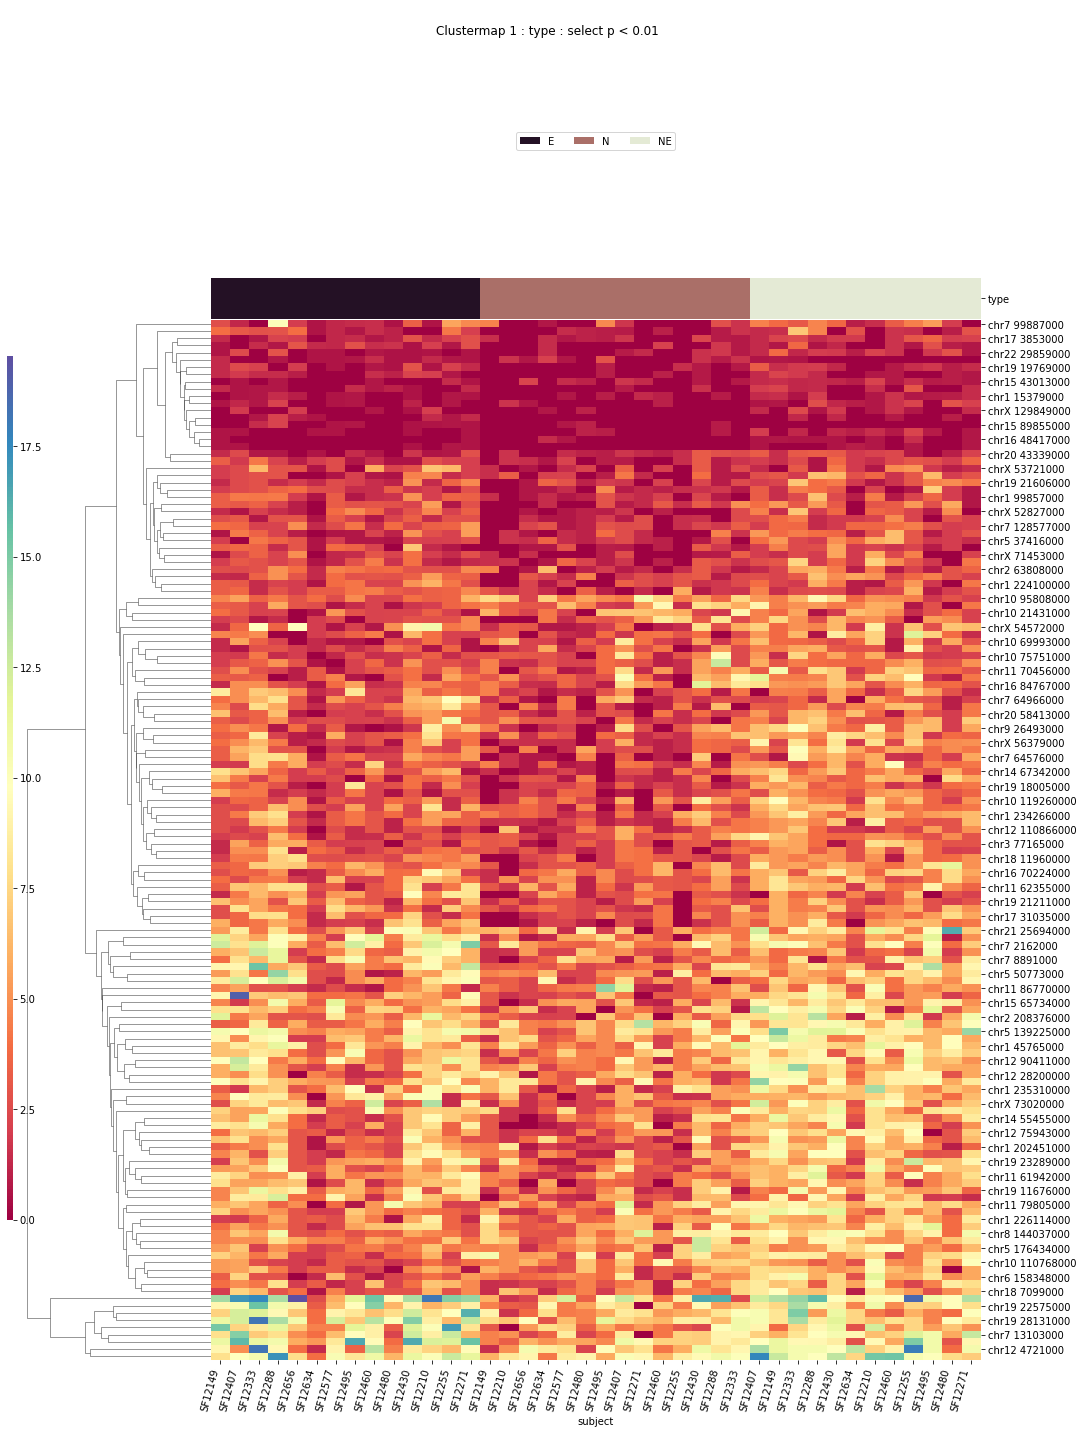

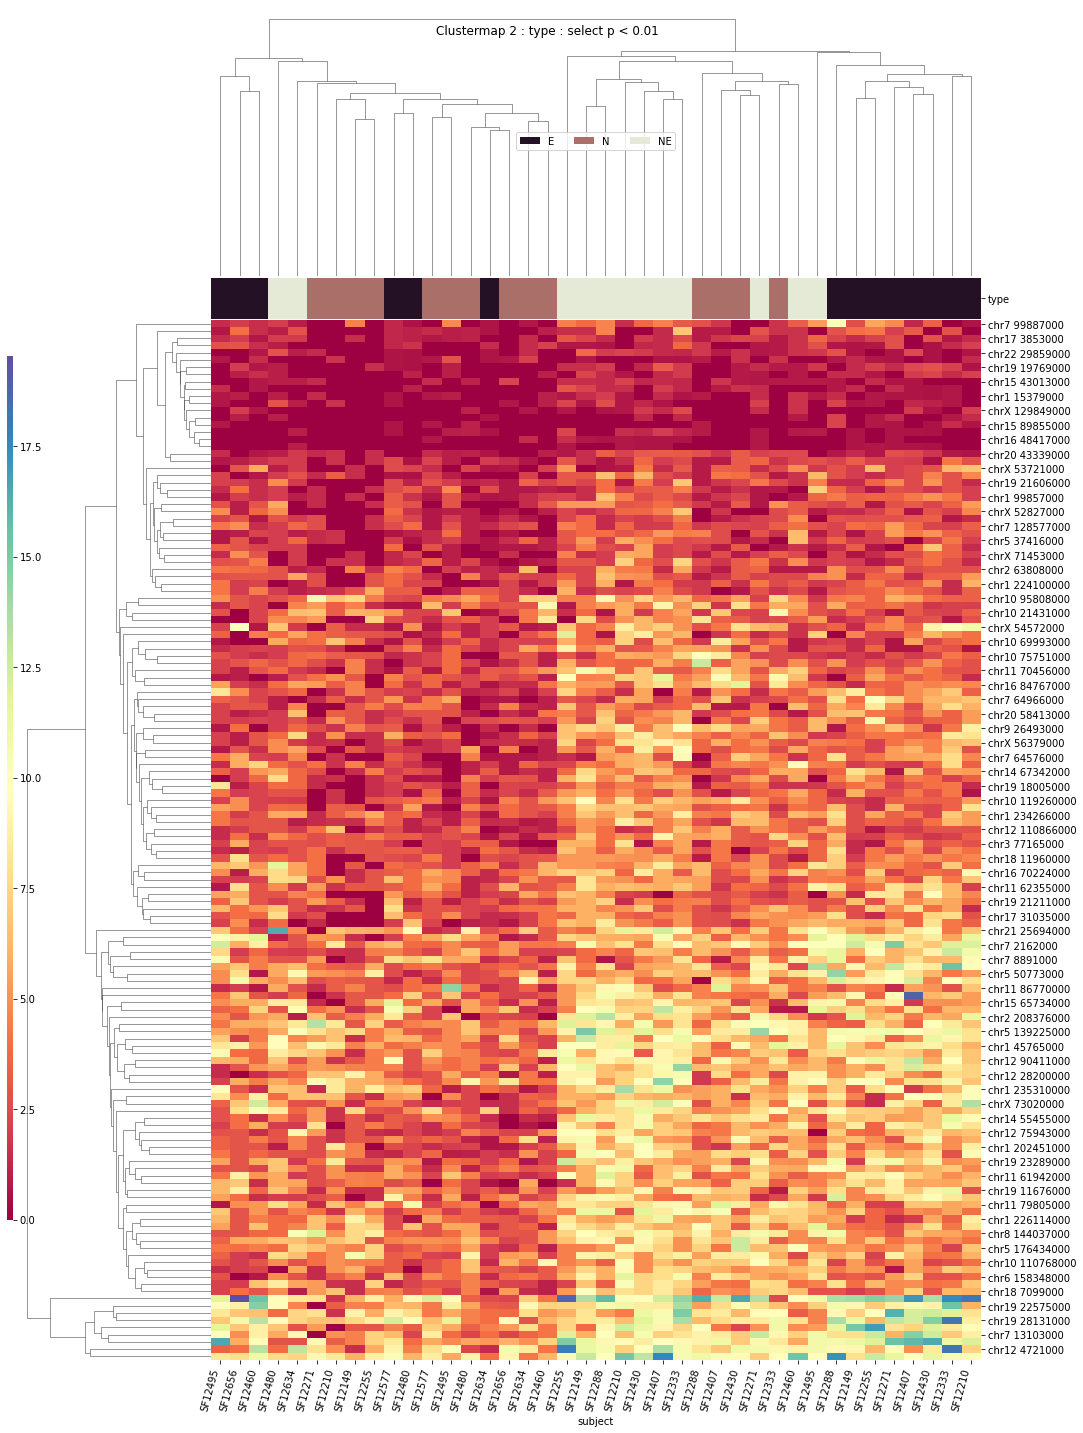

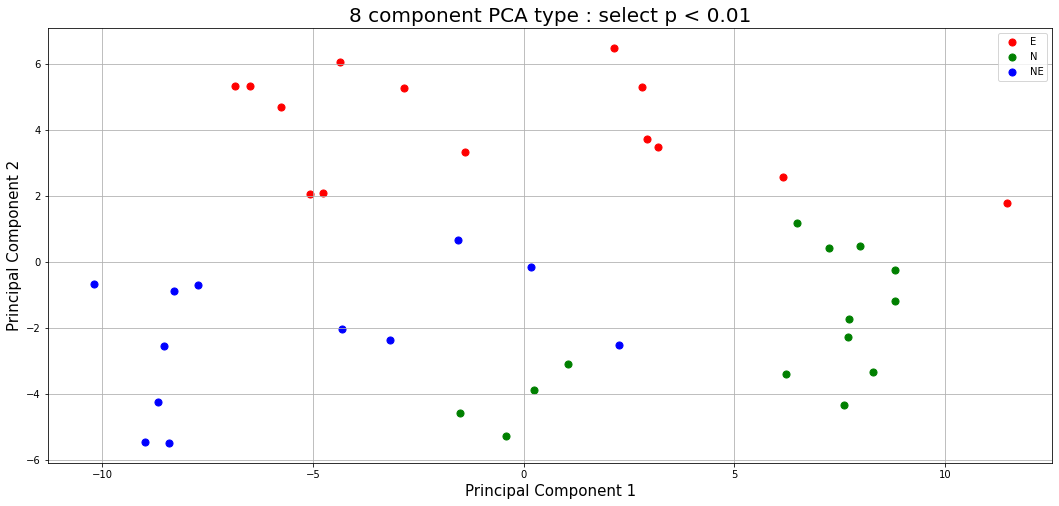

In [56]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [57]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 16:48:48'

type
T-Testing
Boxplotting
Clustermapping
['chr1 234266000' 'chr10 110768000' 'chr14 67342000' 'chr15 43013000'
 'chr15 65734000' 'chr17 28223000' 'chr19 18005000' 'chr19 19769000'
 'chr2 156450000' 'chr20 35152000' 'chr3 129340000' 'chr3 143087000'
 'chr5 139225000' 'chr5 37416000' 'chr6 158348000' 'chr7 129217000'
 'chr7 31154000' 'chr8 144037000' 'chrX 52827000' 'chrX 56379000'
 'chrX 73020000' 'subject' 'type']


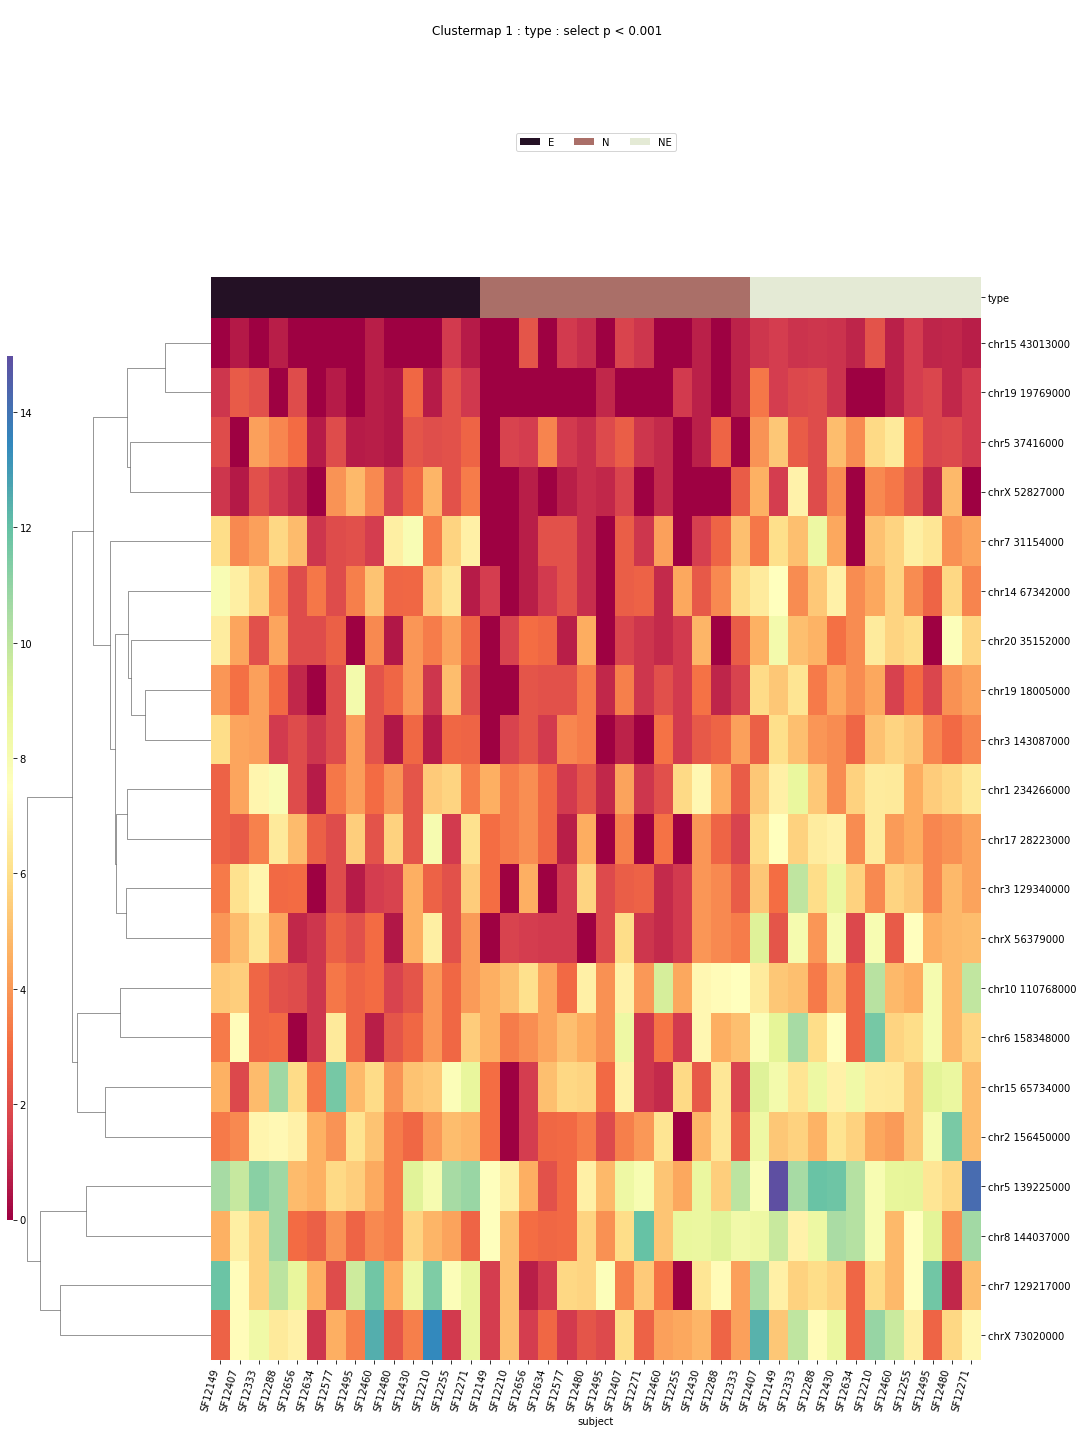

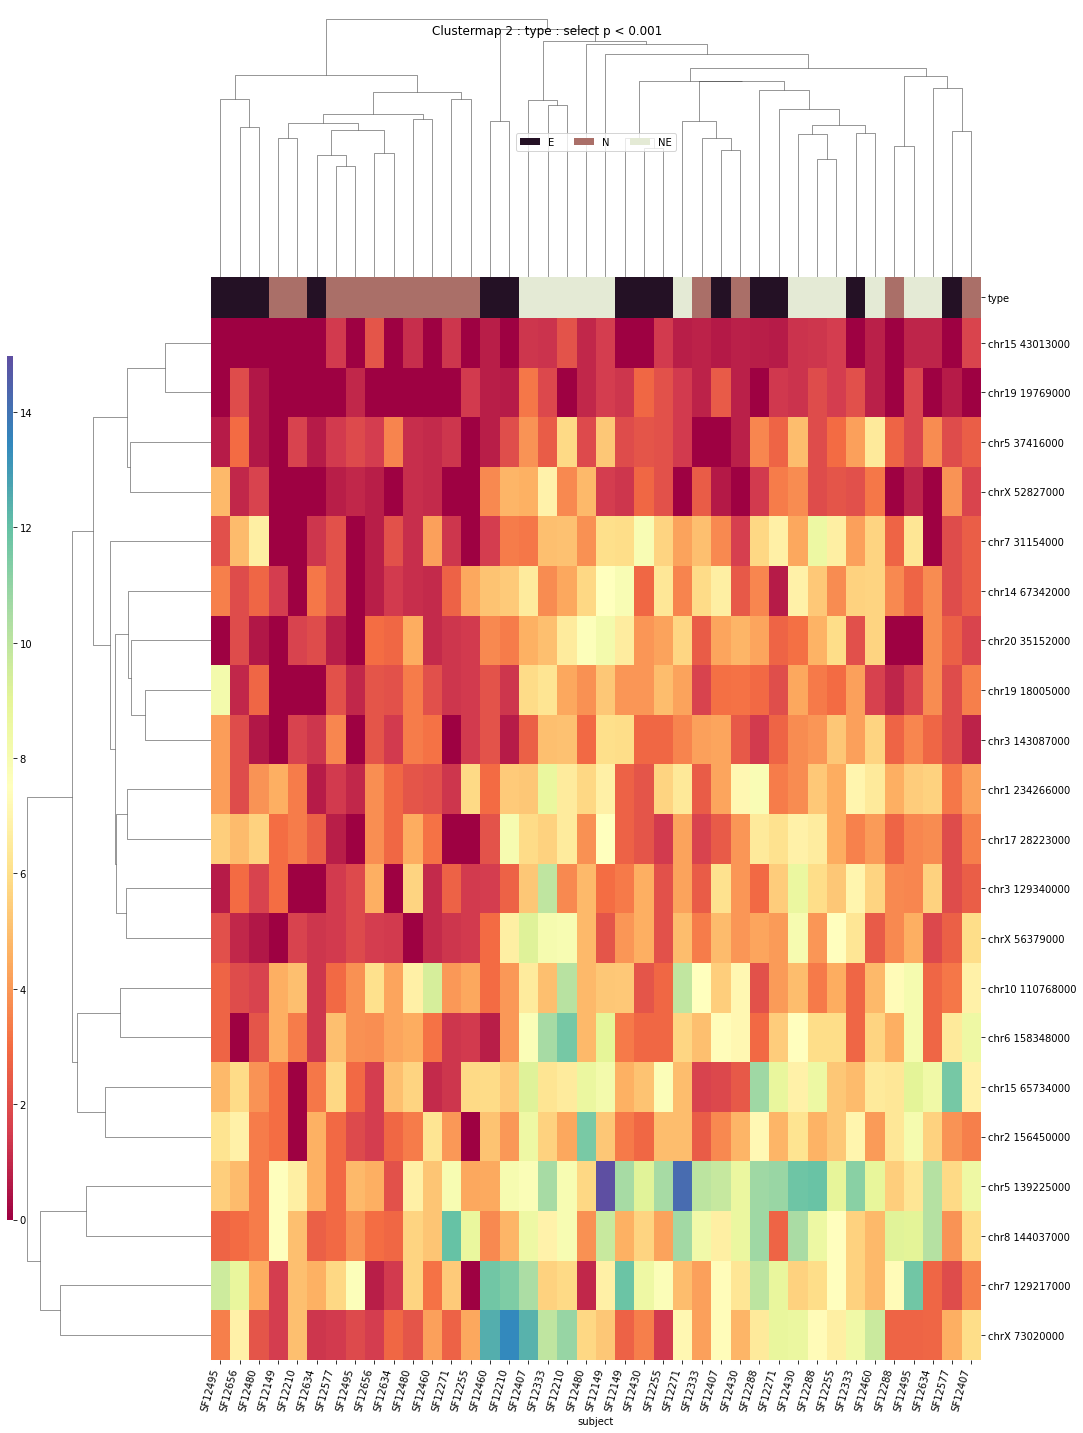

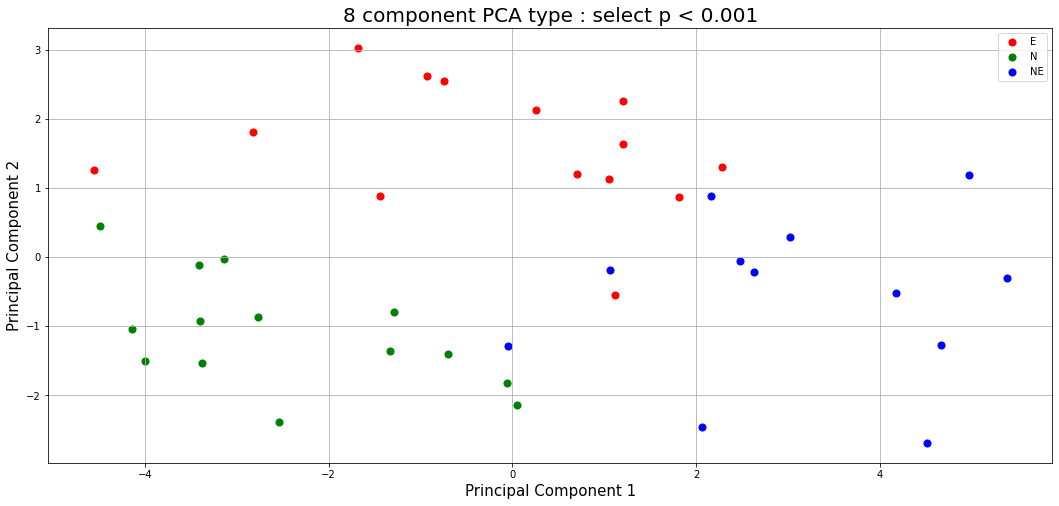

In [58]:
for column in ['type']:
    print(column)
    ttests_boxplots_and_heatmaps(gpmp_df,
        gpmp_df.columns[gpmp_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [59]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210614 17:02:23'

---

In [60]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [61]:
pd.set_option('display.max_columns', default_max_columns)

In [62]:
pd.set_option('display.max_rows',default_max_rows)

In [63]:
pd.set_option('display.precision', default_precision)